# Importações 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine



# Configuções Iniciais


In [2]:
plt.style.use('default')

# Caminhos relativos para os dados na mesma pasta que o notebook

In [3]:
data_paths = {
    'BNB': 'moedas/coin_BinanceCoin.csv',
    'BTC': 'moedas/coin_Bitcoin.csv',    
    'ADA': 'moedas/coin_Cardano.csv',
    'DOGE': 'moedas/coin_Dogecoin.csv',
    'ETH': 'moedas/coin_Ethereum.csv',
    'LTC': 'moedas/coin_Litecoin.csv',
    'SOL': 'moedas/coin_Solana.csv',
    'USDT': 'moedas/coin_Tether.csv',
    'TRX': 'moedas/coin_Tron.csv',
    'USDC': 'moedas/coin_USDCoin.csv' 
}



# Carregar os dados

In [4]:
dfs = {}
for key, path in data_paths.items():
    try:
        df = pd.read_csv(path)
        if 'Close' in df.columns:
            dfs[key] = df
        else:
            print(f"A coluna 'Close' não está presente em {key}.")
    except FileNotFoundError:
        print(f"Arquivo não encontrado: {path}")
    except pd.errors.EmptyDataError:
        print(f"Arquivo vazio: {path}")
    except Exception as e:
        print(f"Erro ao ler {path}: {e}")

# Verificar se os dados foram carregados corretamente

In [5]:
for key, df in dfs.items():
    print(f"{key} dataframe shape: {df.shape}")
    print(df.head())

BNB dataframe shape: (1442, 10)
   SNo          Name Symbol                 Date      High       Low  \
0    1  Binance Coin    BNB  2017-07-26 23:59:59  0.109013  0.099266   
1    2  Binance Coin    BNB  2017-07-27 23:59:59  0.108479  0.100888   
2    3  Binance Coin    BNB  2017-07-28 23:59:59  0.109019  0.101473   
3    4  Binance Coin    BNB  2017-07-29 23:59:59  0.111264  0.101108   
4    5  Binance Coin    BNB  2017-07-30 23:59:59  0.108138  0.103162   

       Open     Close    Volume   Marketcap  
0  0.105893  0.105138  200395.0  10513800.0  
1  0.105108  0.107737  344499.0  10773700.0  
2  0.107632  0.104067  342568.0  10406700.0  
3  0.104782  0.107811  340218.0  10781100.0  
4  0.107935  0.106414  224261.0  10641400.0  
BTC dataframe shape: (2991, 10)
   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoi

# Função para limpar os dados

In [6]:
def clean_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df[['Close']]
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

# Limpar todos os datasframes


In [7]:
for key in dfs:
    try:
        dfs[key] = clean_data(dfs[key])
        dfs[key].rename(columns={'Close': key}, inplace=True)
    except Exception as e:
        print(f"Erro ao limpar dados de {key}: {e}")

# Unir todos os dataframes em um só

In [8]:
crypto_df = pd.concat(dfs.values(), axis=1)

# Verificar os dados consolidados


In [9]:
print(crypto_df.head())

                     BNB         BTC  ADA  DOGE  ETH      LTC  SOL  USDT  TRX  \
Date                                                                            
2013-04-29 23:59:59  NaN  144.539993  NaN   NaN  NaN  4.38390  NaN   NaN  NaN   
2013-04-30 23:59:59  NaN  139.000000  NaN   NaN  NaN  4.29649  NaN   NaN  NaN   
2013-05-01 23:59:59  NaN  116.989998  NaN   NaN  NaN  3.80101  NaN   NaN  NaN   
2013-05-02 23:59:59  NaN  105.209999  NaN   NaN  NaN  3.37198  NaN   NaN  NaN   
2013-05-03 23:59:59  NaN   97.750000  NaN   NaN  NaN  3.04491  NaN   NaN  NaN   

                     USDC  
Date                       
2013-04-29 23:59:59   NaN  
2013-04-30 23:59:59   NaN  
2013-05-01 23:59:59   NaN  
2013-05-02 23:59:59   NaN  
2013-05-03 23:59:59   NaN  


# Análise Exploratória


 1. Tendências históricas


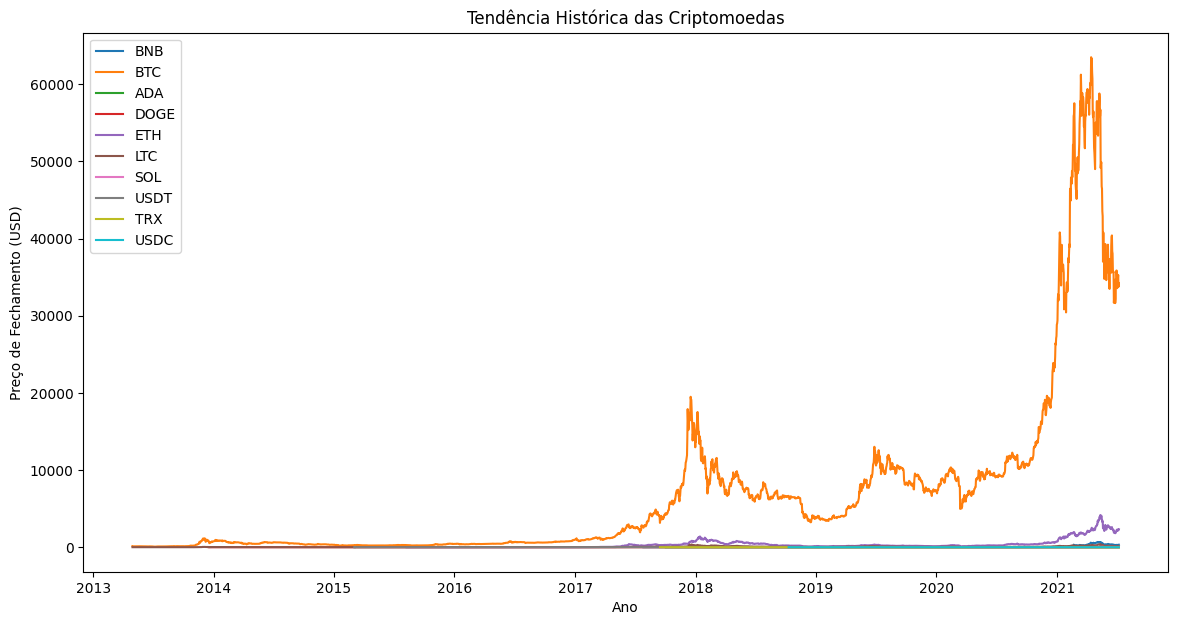

In [10]:
plt.figure(figsize=(14, 7))
for column in crypto_df.columns:
    if np.issubdtype(crypto_df[column].dtype, np.number):
        plt.plot(crypto_df[column], label=column)
plt.legend()
plt.title('Tendência Histórica das Criptomoedas')
plt.xlabel('Ano')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()

2. Valores Médios

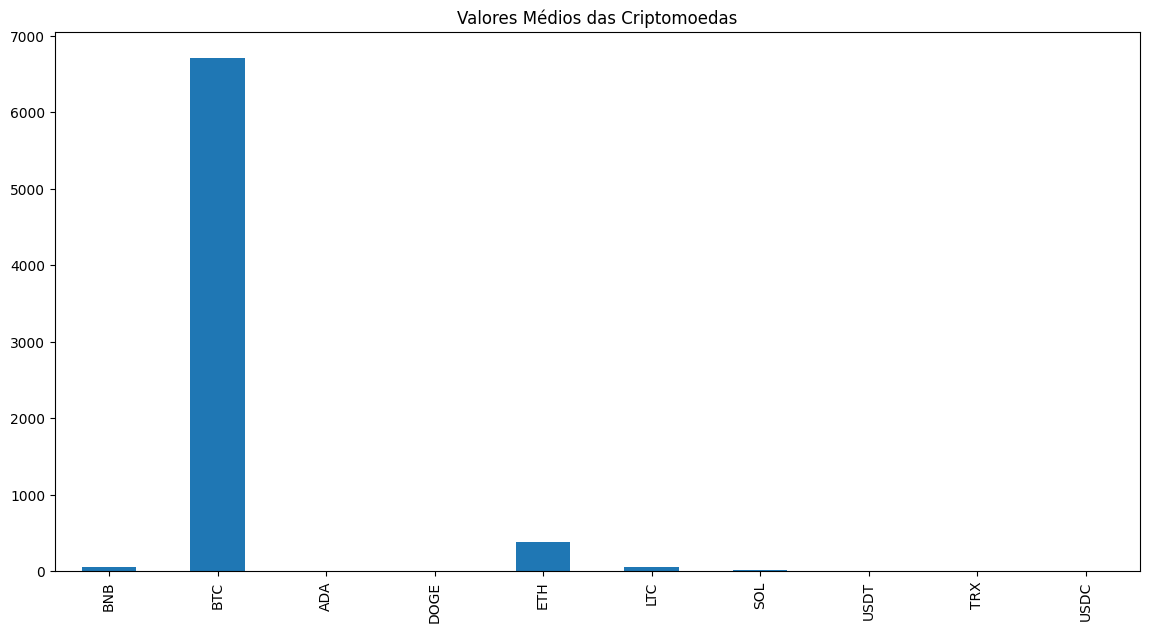

In [11]:
mean_values = crypto_df.mean()
plt.figure(figsize=(14, 7))
mean_values.plot(kind='bar')
plt.title('Valores Médios das Criptomoedas')
plt.show()

3. Variação Anual

<Figure size 1400x700 with 0 Axes>

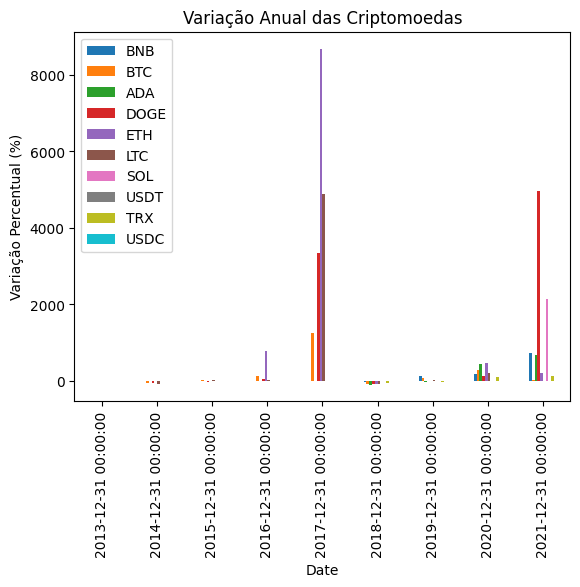

In [12]:
annual_returns = crypto_df.resample('YE').ffill().pct_change() * 100
plt.figure(figsize=(14, 7))
annual_returns.plot(kind='bar')
plt.title('Variação Anual das Criptomoedas')
plt.ylabel('Variação Percentual (%)')
plt.show()

4. Análise por dia da semana

<Figure size 1400x700 with 0 Axes>

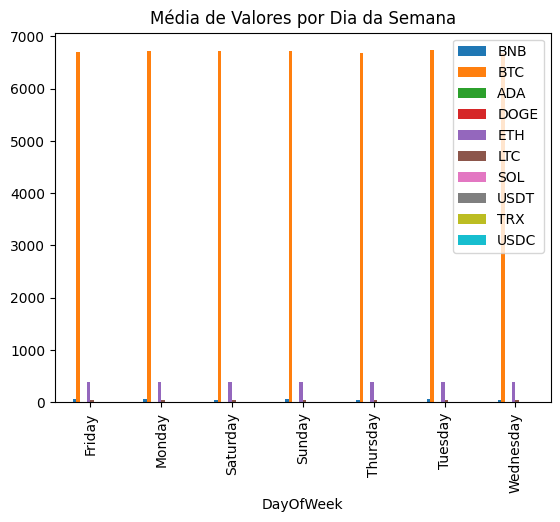

In [13]:
crypto_df['DayOfWeek'] = crypto_df.index.day_name()
mean_by_day = crypto_df.groupby('DayOfWeek').mean()
plt.figure(figsize=(14, 7))
mean_by_day.plot(kind='bar')
plt.title('Média de Valores por Dia da Semana')
plt.show()

5. Moeda mais interessante



Moeda mais interessante por cada critério:
Mean Annual Return (%)              SOL
Volatility (Standard Deviation)    DOGE
Total Growth (%)                    BTC
dtype: object


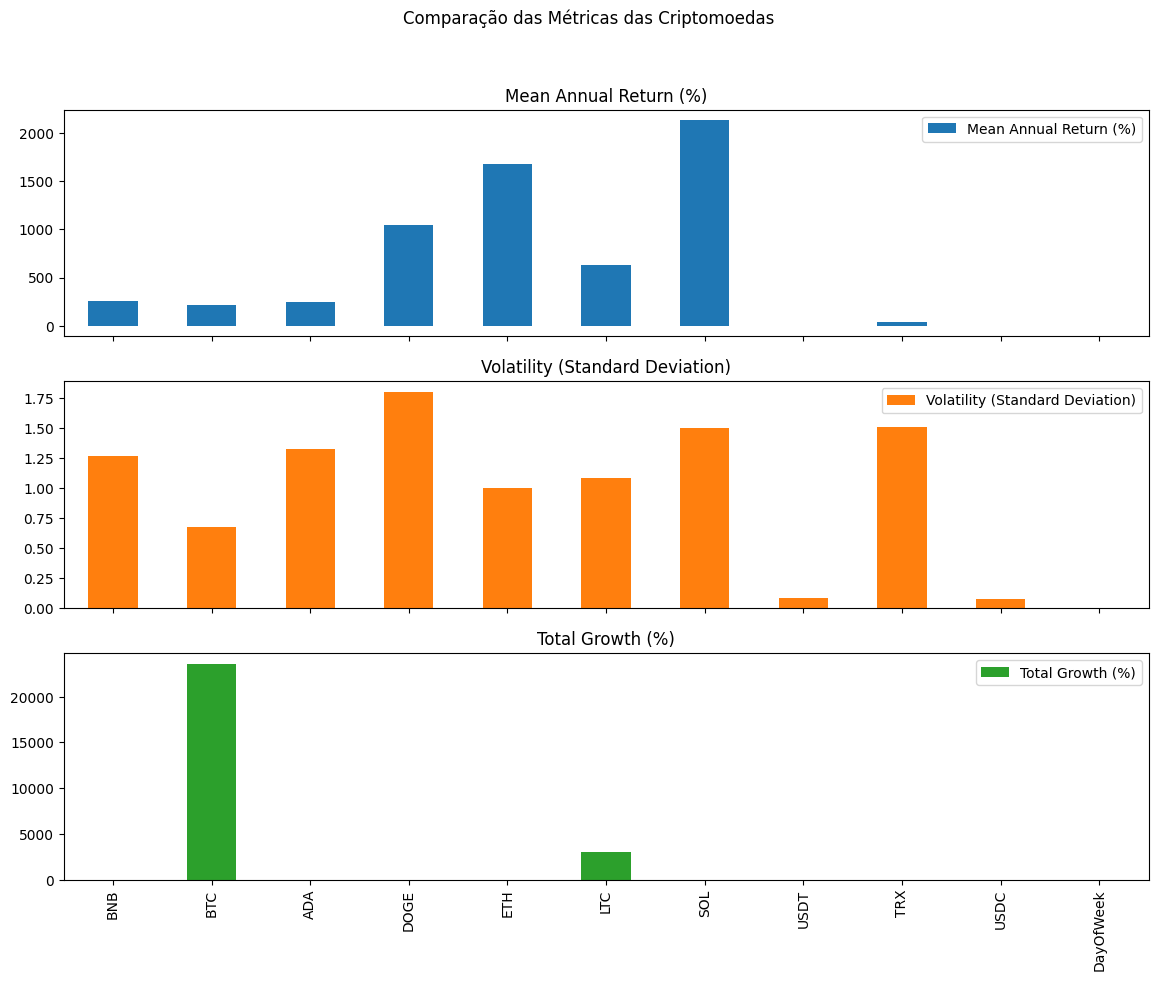

In [22]:
crypto_df = crypto_df.apply(pd.to_numeric, errors='coerce')

annual_returns = crypto_df.resample('YE').ffill().pct_change(fill_method=None) * 100

mean_annual_returns = annual_returns.mean()

volatility = crypto_df.pct_change(fill_method=None).std() * np.sqrt(252)

total_growth = (crypto_df.iloc[-1] / crypto_df.iloc[0] - 1) * 100

metrics = pd.DataFrame({
    'Mean Annual Return (%)': mean_annual_returns,
    'Volatility (Standard Deviation)': volatility,
    'Total Growth (%)': total_growth
})

least_interesting = metrics.idxmax()
print("\nMoeda mais interessante por cada critério:")
print(least_interesting)

metrics.plot(kind='bar', subplots=True, layout=(3, 1), figsize=(14, 10), legend=True)
plt.suptitle('Comparação das Métricas das Criptomoedas')
plt.show()

6. Moeda menos interessante



Moeda menos interessante por cada critério:
Mean Annual Return (%)             USDC
Volatility (Standard Deviation)    USDC
Total Growth (%)                    LTC
dtype: object


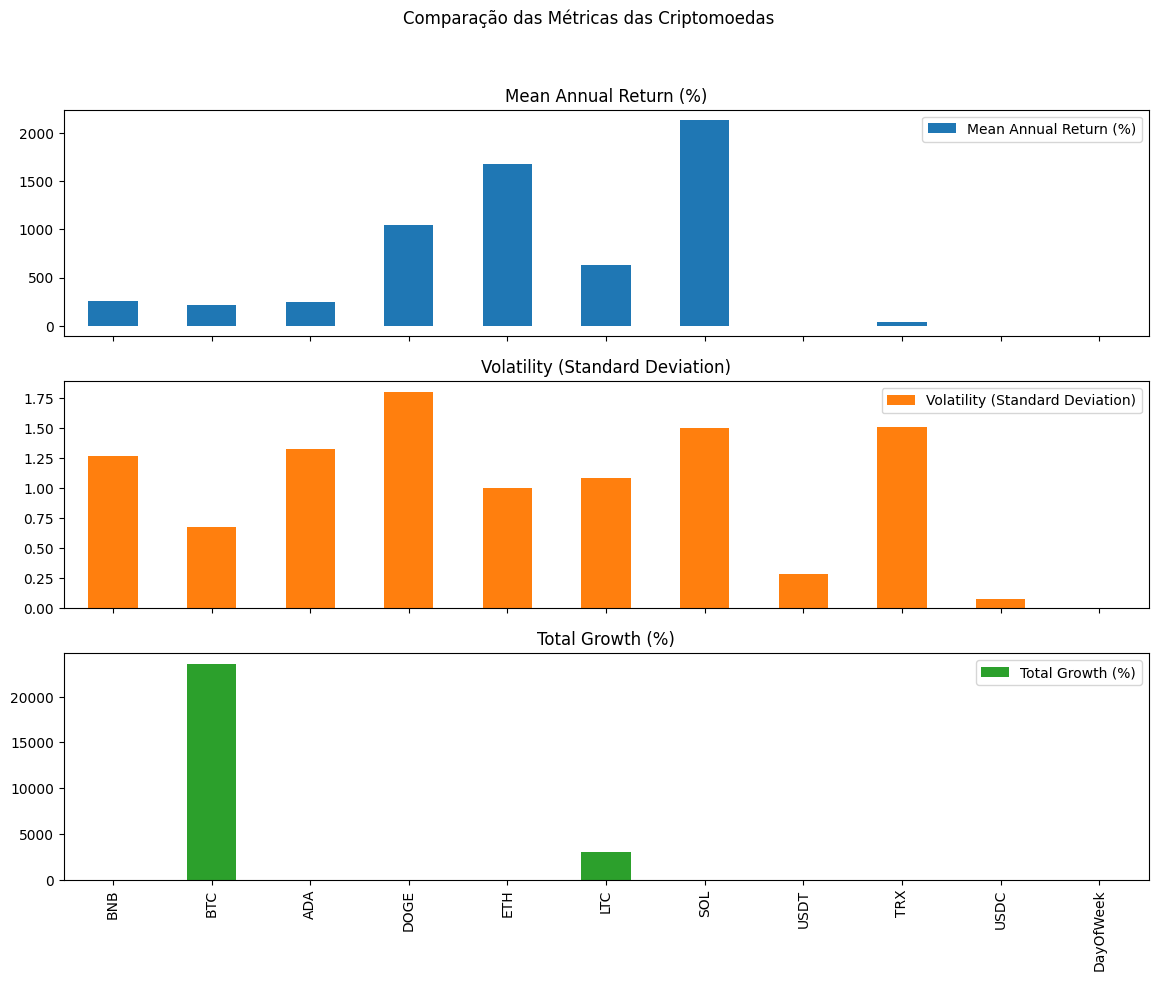

In [15]:
least_interesting = metrics.idxmin()
print("\nMoeda menos interessante por cada critério:")
print(least_interesting)

metrics.plot(kind='bar', subplots=True, layout=(3, 1), figsize=(14, 10), legend=True)
plt.suptitle('Comparação das Métricas das Criptomoedas')
plt.show()

7. Correlação entre os valores para todas as criptomoedas

                BNB       BTC       ADA      DOGE       ETH       LTC  \
BNB        1.000000  0.856401  0.893322  0.889387  0.904260  0.643628   
BTC        0.856401  1.000000  0.855017  0.648206  0.904147  0.812679   
ADA        0.893322  0.855017  1.000000  0.830919  0.960793  0.766620   
DOGE       0.889387  0.648206  0.830919  1.000000  0.837741  0.540727   
ETH        0.904260  0.904147  0.960793  0.837741  1.000000  0.831274   
LTC        0.643628  0.812679  0.766620  0.540727  0.831274  1.000000   
SOL        0.948031  0.716857  0.930089  0.929962  0.927281  0.805546   
USDT      -0.081212  0.036401 -0.069347  0.000833  0.031501  0.082560   
TRX        0.727638  0.650914  0.795993  0.640299  0.787882  0.793912   
USDC      -0.217447 -0.323815 -0.236765 -0.168840 -0.274301 -0.292389   
DayOfWeek       NaN       NaN       NaN       NaN       NaN       NaN   

                SOL      USDT       TRX      USDC  DayOfWeek  
BNB        0.948031 -0.081212  0.727638 -0.217447        NaN

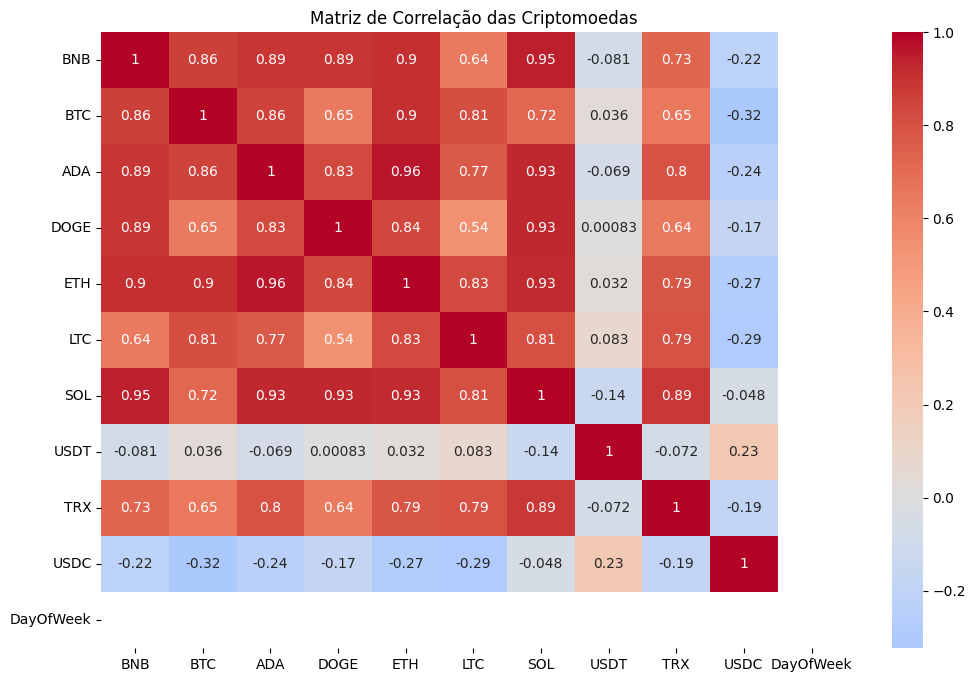

In [16]:
correlation_matrix = crypto_df.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Criptomoedas')
plt.show()

## Perguntas Extras

* Qual é a distribuição dos valores para cada criptomoeda?

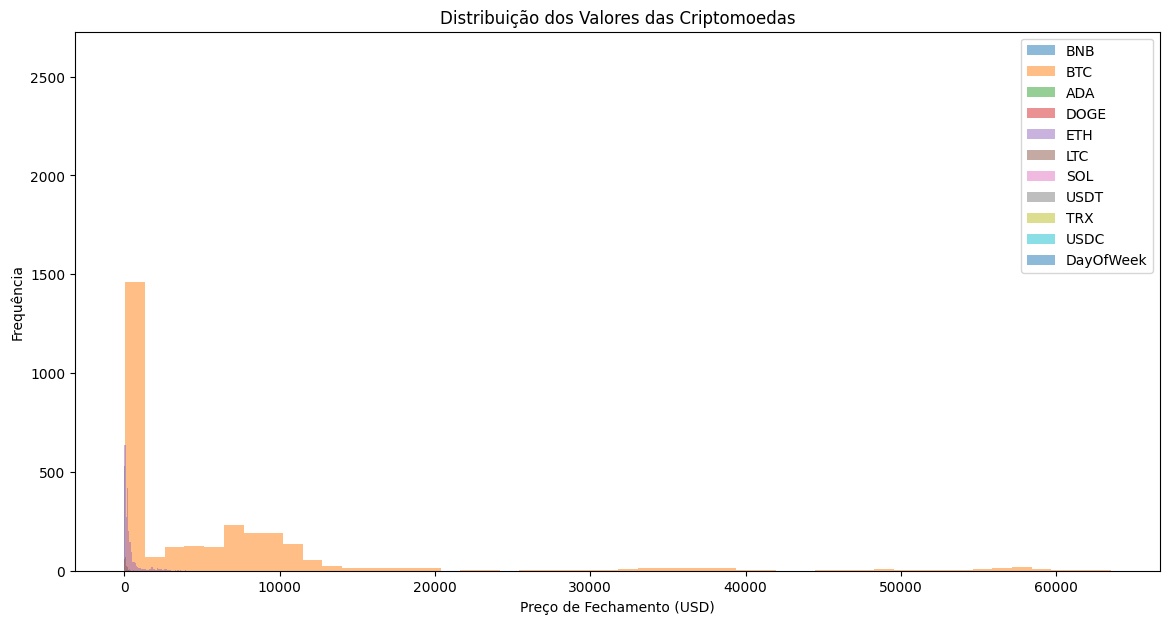

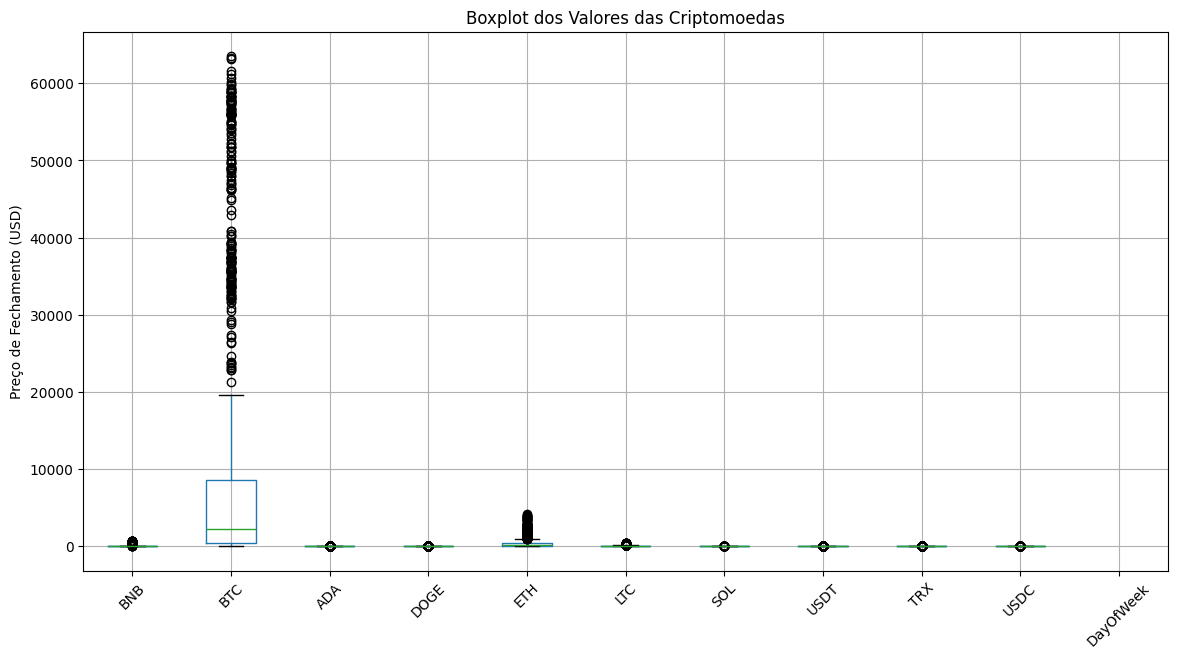

In [17]:
plt.figure(figsize=(14, 7))
for column in crypto_df.columns:
    if pd.api.types.is_numeric_dtype(crypto_df[column]):
        crypto_df[column].plot(kind='hist', alpha=0.5, bins=50, label=column)
plt.legend()
plt.title('Distribuição dos Valores das Criptomoedas')
plt.xlabel('Preço de Fechamento (USD)')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(14, 7))
crypto_df.boxplot()
plt.title('Boxplot dos Valores das Criptomoedas')
plt.ylabel('Preço de Fechamento (USD)')
plt.xticks(rotation=45)
plt.show()

* Qual foi o maior e o menor valor registrado para cada criptomoeda ao longo do período analisado?

In [18]:
max_values = crypto_df.max()
min_values = crypto_df.min()

print("Maiores valores registrados para cada criptomoeda:")
print(max_values)

print("\nMenores valores registrados para cada criptomoeda:")
print(min_values)

Maiores valores registrados para cada criptomoeda:
BNB            675.684077
BTC          63503.457930
ADA              2.309113
DOGE             0.684777
ETH           4168.701049
LTC            386.450779
SOL             55.910960
USDT             1.205740
TRX              0.220555
USDC             1.044029
DayOfWeek             NaN
dtype: float64

Menores valores registrados para cada criptomoeda:
BNB           0.099867
BTC          68.431000
ADA           0.018539
DOGE          0.000087
ETH           0.434829
LTC           1.157010
SOL           0.515273
USDT          0.606229
TRX           0.001427
USDC          0.970124
DayOfWeek          NaN
dtype: float64


# Importação para o Banco de Dados



* Conexão do banco de dados com a ferramenta de visualização de dados